In [ ]:
# Install Kaggle
!pip install -q kaggle

# Upload your kaggle.json
from google.colab import files
files.upload()  # Upload kaggle.json file

# Setup Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d chethuhn/network-intrusion-dataset

# Unzip
!unzip network-intrusion-dataset.zip -d ./data

# List files
!ls -lh ./data

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset
License(s): CC0-1.0
 66% 152M/230M [00:00<00:00, 1.59GB/s]
100% 230M/230M [00:00<00:00, 981MB/s] 
Archive:  network-intrusion-dataset.zip
  inflating: ./data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  
  inflating: ./data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: ./data/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: ./data/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: ./data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: ./data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: ./data/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: ./data/Wednesday-workingHours.pcap_ISCX.csv  
total 844M
-rw-r--r-- 1 root root  74M Aug 28  2023 Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
-rw-r--r-- 1 root root  74M Aug 28  2023 Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
-rw-r--r-- 1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [ ]:

data1 = pd.read_csv('/content/data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
data2 = pd.read_csv('/content/data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data3 = pd.read_csv('/content/data/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data4 = pd.read_csv('/content/data/Monday-WorkingHours.pcap_ISCX.csv')
data5 = pd.read_csv('/content/data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv('/content/data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data7 = pd.read_csv('/content/data/Tuesday-WorkingHours.pcap_ISCX.csv')
data8 = pd.read_csv('/content/data/Wednesday-workingHours.pcap_ISCX.csv')


In [ ]:
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 225745 rows, 79 columns
Data2 -> 286467 rows, 79 columns
Data3 -> 191033 rows, 79 columns
Data4 -> 529918 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 170366 rows, 79 columns
Data7 -> 445909 rows, 79 columns
Data8 -> 692703 rows, 79 columns


In [ ]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [ ]:
for d in data_list: del d

In [ ]:
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [ ]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [ ]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


count          mean           std  \
Destination Port             2830743.0  8.071483e+03  1.828363e+04   
Flow Duration                2830743.0  1.478566e+07  3.365374e+07   
Total Fwd Packets            2830743.0  9.361160e+00  7.496728e+02   
Total Backward Packets       2830743.0  1.039377e+01  9.973883e+02   
Total Length of Fwd Packets  2830743.0  5.493024e+02  9.993589e+03   
Total Length of Bwd Packets  2830743.0  1.616264e+04  2.263088e+06   
Fwd Packet Length Max        2830743.0  2.075999e+02  7.171848e+02   
Fwd Packet Length Min        2830743.0  1.871366e+01  6.033935e+01   
Fwd Packet Length Mean       2830743.0  5.820194e+01  1.860912e+02   
Fwd Packet Length Std        2830743.0  6.891013e+01  2.811871e+02   
Bwd Packet Length Max        2830743.0  8.708495e+02  1.946367e+03   
Bwd Packet Length Min        2830743.0  4.104958e+01  6.886260e+01   
Bwd Packet Length Mean       2830743.0  3.059493e+02  6.052568e+02   
Bwd Packet Length Std        2830743.0  3.353257e+02  8.396932e+02   
Flow Bytes/s                 2829385.0           inf           NaN   
Flow Packets/s               2830743.0           inf           NaN   
Flow IAT Mean                2830743.0  1.298449e+06  4.507944e+06   
Flow IAT Std                 2830743.0  2.919271e+06  8.045870e+06   
Flow IAT Max                 2830743.0  9.182475e+06  2.445954e+07   
Flow IAT Min                 2830743.0  1.623796e+05  2.950282e+06   
Fwd IAT Total                2830743.0  1.448296e+07  3.357581e+07   
Fwd IAT Mean                 2830743.0  2.610193e+06  9.525722e+06   
Fwd IAT Std                  2830743.0  3.266957e+06  9.639055e+06   
Fwd IAT Max                  2830743.0  9.042939e+06  2.452916e+07   
Fwd IAT Min                  2830743.0  1.021893e+06  8.591436e+06   
Bwd IAT Total                2830743.0  9.893830e+06  2.873661e+07   
Bwd IAT Mean                 2830743.0  1.805784e+06  8.887197e+06   
Bwd IAT Std                  2830743.0  1.485973e+06  6.278469e+06   
Bwd IAT Max                  2830743.0  4.684692e+06  1.716095e+07   
Bwd IAT Min                  2830743.0  9.672614e+05  8.308983e+06   
Fwd PSH Flags                2830743.0  4.644646e-02  2.104500e-01   
Bwd PSH Flags                2830743.0  0.000000e+00  0.000000e+00   
Fwd URG Flags                2830743.0  1.112782e-04  1.054826e-02   
Bwd URG Flags                2830743.0  0.000000e+00  0.000000e+00   
Fwd Header Length            2830743.0 -2.599739e+04  2.105286e+07   
Bwd Header Length            2830743.0 -2.273275e+03  1.452209e+06   
Fwd Packets/s                2830743.0  6.386535e+04  2.475371e+05   
Bwd Packets/s                2830743.0  6.995192e+03  3.815170e+04   
Min Packet Length            2830743.0  1.643450e+01  2.523772e+01   
Max Packet Length            2830743.0  9.504024e+02  2.028229e+03   
Packet Length Mean           2830743.0  1.719444e+02  3.054915e+02   
Packet Length Std            2830743.0  2.949756e+02  6.318001e+02   
Packet Length Variance       2830743.0  4.861548e+05  1.647490e+06   
FIN Flag Count               2830743.0  3.537976e-02  1.847378e-01   
SYN Flag Count               2830743.0  4.644646e-02  2.104500e-01   
RST Flag Count               2830743.0  2.423392e-04  1.556536e-02   
PSH Flag Count               2830743.0  2.980705e-01  4.574107e-01   
ACK Flag Count               2830743.0  3.158443e-01  4.648513e-01   
URG Flag Count               2830743.0  9.482316e-02  2.929706e-01   
CWE Flag Count               2830743.0  1.112782e-04  1.054826e-02   
ECE Flag Count               2830743.0  2.433990e-04  1.559935e-02   
Down/Up Ratio                2830743.0  6.835004e-01  6.804920e-01   
Average Packet Size          2830743.0  1.919837e+02  3.318603e+02   
Avg Fwd Segment Size         2830743.0  5.820194e+01  1.860912e+02   
Avg Bwd Segment Size         2830743.0  3.059493e+02  6.052568e+02   
Fwd Header Length.1          2830743.0 -2.599739e+04  2.105286e+07   
Fwd Avg Bytes/Bulk           2830743.0  0.0

In [ ]:
pd.options.display.max_columns = 80
data

Destination Port  Flow Duration  Total Fwd Packets  \
0                  54865              3                  2   
1                  55054            109                  1   
2                  55055             52                  1   
3                  46236             34                  1   
4                  54863              3                  2   
...                  ...            ...                ...   
692698                53          32215                  4   
692699                53            324                  2   
692700             58030             82                  2   
692701                53        1048635                  6   
692702                53          94939                  4   

        Total Backward Packets  Total Length of Fwd Packets  \
0                            0                           12   
1                            1                            6   
2                            1                            6   
3                            1                            6   
4                            0                           12   
...                        ...                          ...   
692698                       2                          112   
692699                       2                           84   
692700                       1                           31   
692701                       2                          192   
692702                       2                          188   

        Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                 0                      6   
1                                 6                      6   
2                                 6                      6   
3                                 6                      6   
4                                 0                      6   
...                             ...                    ...   
692698                          152                     28   
692699                          362                     42   
692700                            6                     31   
692701                          256                     32   
692702                          226                     47   

        Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                           6                     6.0                0.00000   
1                           6                     6.0                0.00000   
2                           6                     6.0                0.00000   
3                           6                     6.0                0.00000   
4                           6                     6.0                0.00000   
...                       ...                     ...                    ...   
692698                     28                    28.0                0.00000   
692699                     42                    42.0                0.00000   
692700                      0                    15.5               21.92031   
692701                     32                    32.0                0.00000   
692702                     47                    47.0                0.00000   

        Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                           0                      0                     0.0   
1                           6                      6                     6.0   
2                           6                      6                     6.0   
3                           6                      6                     6.0   
4                           0                      0                     0.0   
...                       ...                    ...                     ...   
692698                     76                     76                    76.0   
692699                    181                    181                   181.0   
692700                      6                      6                     6.0   


In [ ]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 308381


In [ ]:
data.drop_duplicates(inplace = True)
data.shape

(2522362, 79)

In [ ]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    353
dtype: int64


In [ ]:
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [ ]:
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 353
Missing values after processing infinite values: 3128


In [ ]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [ ]:
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s              1564                        0.06
Flow Packets/s            1564                        0.06


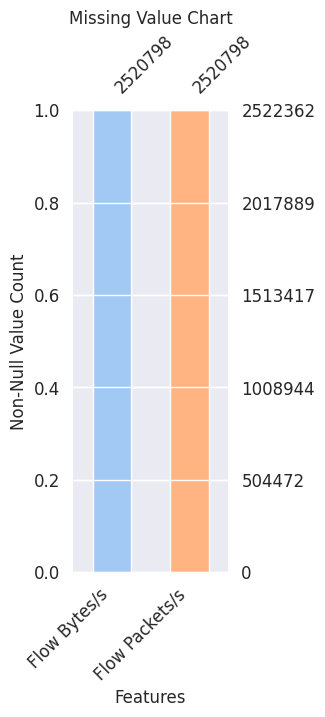

In [ ]:
sns.set_palette('pastel')
colors = sns.color_palette()

missing_vals = [col for col in data.columns if data[col].isna().any()]

fig, ax = plt.subplots(figsize = (2, 6))
msno.bar(data[missing_vals], ax = ax, fontsize = 12, color = colors)
ax.set_xlabel('Features', fontsize = 12)
ax.set_ylabel('Non-Null Value Count', fontsize = 12)
ax.set_title('Missing Value Chart', fontsize = 12)
plt.show()

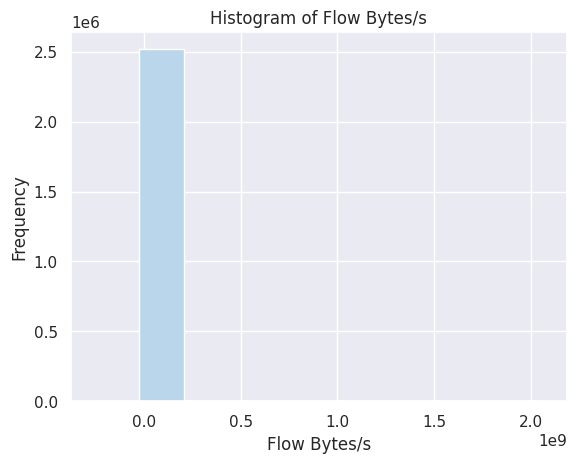

In [ ]:
colors = sns.color_palette('Blues')
plt.hist(data['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

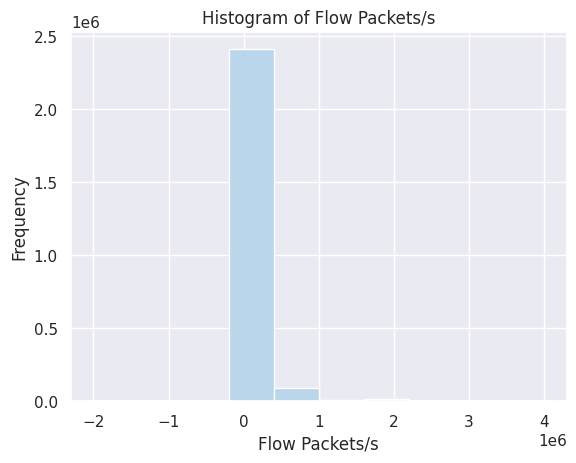

In [ ]:
plt.hist(data['Flow Packets/s'], color = colors[1])
plt.title('Histogram of Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.show()

In [ ]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3715.0378579999997
Median of Flow Packets/s:  69.742244285


In [ ]:
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

/tmp/ipython-input-1422842539.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
/tmp/ipython-input-1422842539.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


In [ ]:
data['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [ ]:
data['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [ ]:
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}


data['Attack Type'] = data['Label'].map(attack_map)

In [ ]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [ ]:
data.drop('Label', axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 3 7 1 6 8 2 4 5]


In [ ]:
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [ ]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [ ]:
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean              :0.0

In [ ]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 32


In [ ]:
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [ ]:
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(504472, 80)

In [ ]:
numeric_cols = data.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = data[col].describe()[1]
    new = sampled_data[col].describe()[1]
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Destination Port                8704.762165           8709.619693           0.06%
Flow Duration                   16581323.773163       16664541.182583       0.50%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Total Fwd Packets               10.276271             11.801783             14.84%
Total Backward Packets          11.565964             13.671102             18.20%
Total Length of Fwd Packets     611.575108            609.676051            0.31%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Total Length of Bwd Packets     18133.153930          22797.828210          25.72%
Fwd Packet Length Max           231.091768            233.184968            0.91%
Fwd Packet Length Min           19.194641             19.227202             0.17%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Fwd Packet Length Mean          63.470104             63.967652             0.78%
Fwd Packet Length Std           77.277587             78.211522             1.21%
Bwd Packet Length Max           974.370031            974.205314            0.02%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Bwd Packet Length Min           43.134670             43.136188             0.00%
Bwd Packet Length Mean          340.413252            340.147273            0.08%
Bwd Packet Length Std           376.311810            375.978616            0.09%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Flow Bytes/s                    1409834.540580        1354378.623235        3.93%
Flow Packets/s                  47262.603268          47040.664859          0.47%
Flow IAT Mean                   1445245.597645        1451209.758825        0.41%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Flow IAT Std                    3276120.003337        3285421.146530        0.28%
Flow IAT Max                    10293098.691924       10324990.025290       0.31%
Flow IAT Min                    170315.698627         172114.015073         1.06%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Fwd IAT Total                   16241759.007512       16323530.876360       0.50%
Fwd IAT Mean                    2917447.144105        2928333.466537        0.37%
Fwd IAT Std                     3666365.865689        3679891.360516        0.37%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Fwd IAT Max                     10136646.258398       10170595.389157       0.33%
Fwd IAT Min                     1134966.753752        1137825.624043        0.25%
Bwd IAT Total                   11103358.523806       11190684.197282       0.79%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Bwd IAT Mean                    2026476.920068        2033360.711983        0.34%
Bwd IAT Std                     1667646.690399        1682435.202259        0.89%
Bwd IAT Max                     5257357.549892        5296220.704721        0.74%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Bwd IAT Min                     1085437.767545        1084244.274313        0.11%
Fwd PSH Flags                   0.048738              0.048934              0.40%
Bwd PSH Flags                   0.000000              0.000000              0.00%
Fwd URG Flags                   0.000032              0.000030              6.25%
Bwd URG Flags                   0.000000              0.000000              0.00%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Fwd Header Length               -29182.101016         -25192.870607         13.67%
Bwd Header Length               -2553.643801          -182.492301           92.85%
Fwd Packets/s                   40834.353243          40668.105738          0.41%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Bwd Packets/s                   6509.474728           6463.699743           0.70%
Min Packet Length               16.823494             16.826422             0.02%
Max Packet Length               1063.097507           1064.619073           0.14%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Packet Length Mean              190.541501            190.652471            0.06%
Packet Length Std               329.998773            330.374342            0.11%
Packet Length Variance          545438.614758         545927.972449         0.09%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

FIN Flag Count                  0.032147              0.032414              0.83%
SYN Flag Count                  0.048738              0.048934              0.40%
RST Flag Count                  0.000272              0.000274              0.58%
PSH Flag Count                  0.297519              0.297293              0.08%
ACK Flag Count                  0.312188              0.312015              0.06%


/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys 

URG Flag Count                  0.101428              0.101001              0.42%
CWE Flag Count                  0.000032              0.000030              6.25%
ECE Flag Count                  0.000273              0.000278              1.60%
Down/Up Ratio                   0.700350              0.699559              0.11%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Average Packet Size             212.311468            212.389738            0.04%
Avg Fwd Segment Size            63.470104             63.967652             0.78%
Avg Bwd Segment Size            340.413252            340.147273            0.08%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Fwd Header Length.1             -29182.101016         -25192.870607         13.67%
Fwd Avg Bytes/Bulk              0.000000              0.000000              0.00%
Fwd Avg Packets/Bulk            0.000000              0.000000              0.00%
Fwd Avg Bulk Rate               0.000000              0.000000              0.00%
Bwd Avg Bytes/Bulk              0.000000              0.000000              0.00%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Bwd Avg Packets/Bulk            0.000000              0.000000              0.00%
Bwd Avg Bulk Rate               0.000000              0.000000              0.00%
Subflow Fwd Packets             10.276271             11.801783             14.84%
Subflow Fwd Bytes               611.563349            609.676051            0.31%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Subflow Bwd Packets             11.565964             13.671102             18.20%
Subflow Bwd Bytes               18132.772274          22797.595250          25.73%
Init_Win_bytes_forward          7265.655351           7260.537927           0.07%
Init_Win_bytes_backward         2230.826079           2250.854386           0.90%


/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys 

act_data_pkt_fwd                6.005904              6.752303              12.43%
min_seg_size_forward            -3080.307029          -1869.751598          39.30%
Active Mean                     91521.689172          92486.524319          1.05%
Active Std                      46163.125326          46237.941638          0.16%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

Active Max                      171910.435398         173586.180069         0.97%
Active Min                      65422.995532          66368.983823          1.45%
Idle Mean                       9331577.511171        9358362.943227        0.29%
Idle Std                        565443.316197         573084.314017         1.35%
Idle Max                        9757716.419817        9790248.714614        0.33%
Idle Min                        8887156.719966        8907697.532571        0.23%
Attack Number                   0.726480              0.723656              0.39%


/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
/tmp/ipython-input-3087525579.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
/tmp/ipython-input-3087525579.py:9: FutureWarning: Series.__getitem__ treating keys as posit

In [ ]:
numeric_cols = data.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = data[col].describe()[1]
    new = sampled_data[col].describe()[1]
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

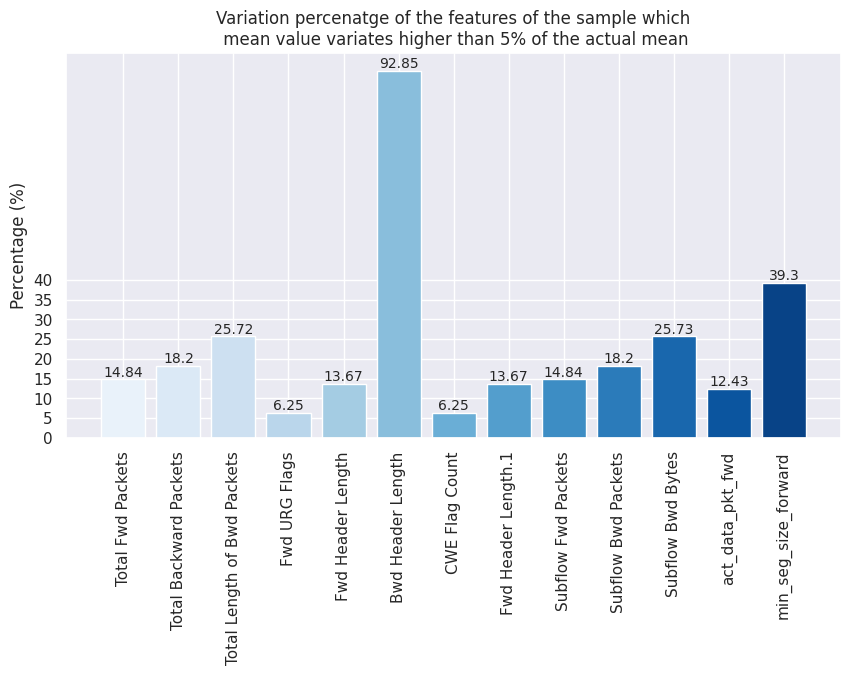

In [ ]:
labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [ ]:
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  Destination Port              : 33264
2.  Flow Duration                 : 256319
3.  Total Fwd Packets             : 683
4.  Total Backward Packets        : 838
5.  Total Length of Fwd Packets   : 9099
6.  Total Length of Bwd Packets   : 24229
7.  Fwd Packet Length Max         : 3686
8.  Fwd Packet Length Min         : 242
9.  Fwd Packet Length Mean        : 35277
10. Fwd Packet Length Std         : 66362
11. Bwd Packet Length Max         : 3888
12. Bwd Packet Length Min         : 450
13. Bwd Packet Length Mean        : 45979
14. Bwd Packet Length Std         : 62866
15. Flow Bytes/s                  : 347114
16. Flow Packets/s                : 288254
17. Flow IAT Mean                 : 274064
18. Flow IAT Std                  : 229405
19. Flow IAT Max                  : 166881
20. Flow IAT Min                  : 45911
21. Fwd IAT Total                 : 119286
22. Fwd IAT Mean                  : 164137
23. Fwd IAT Std                   : 148396
24. Fwd IAT

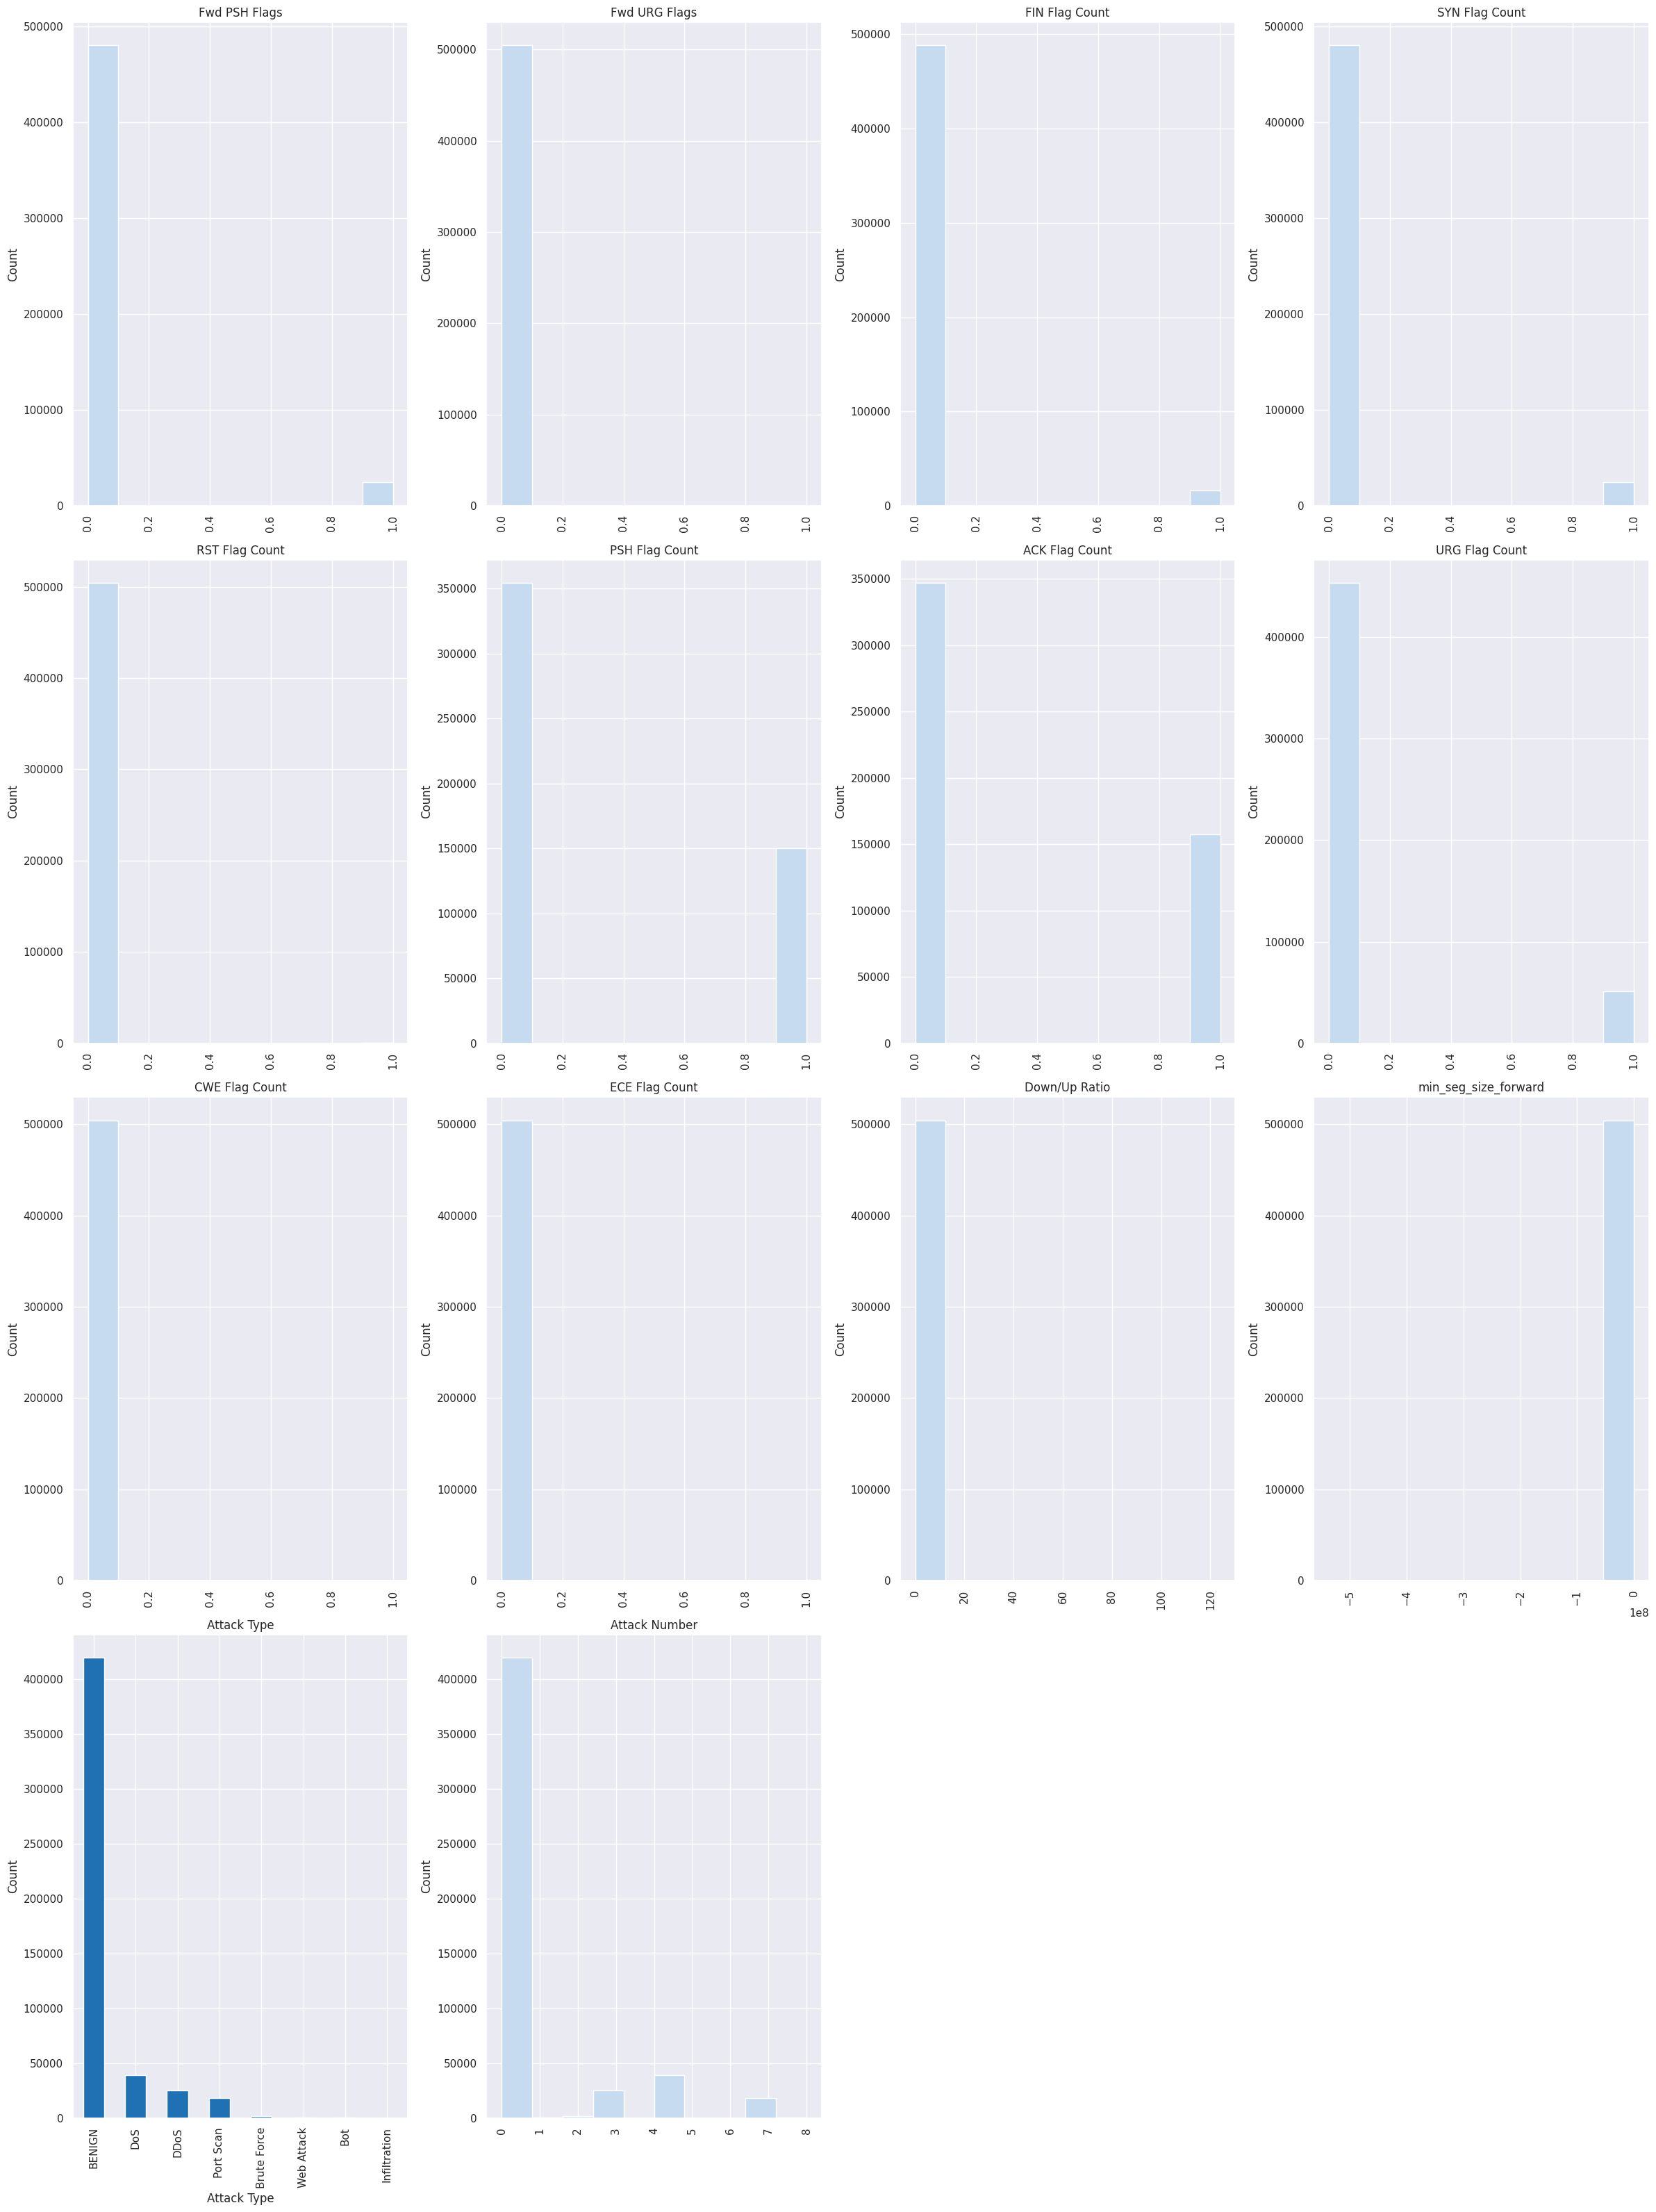

In [ ]:
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


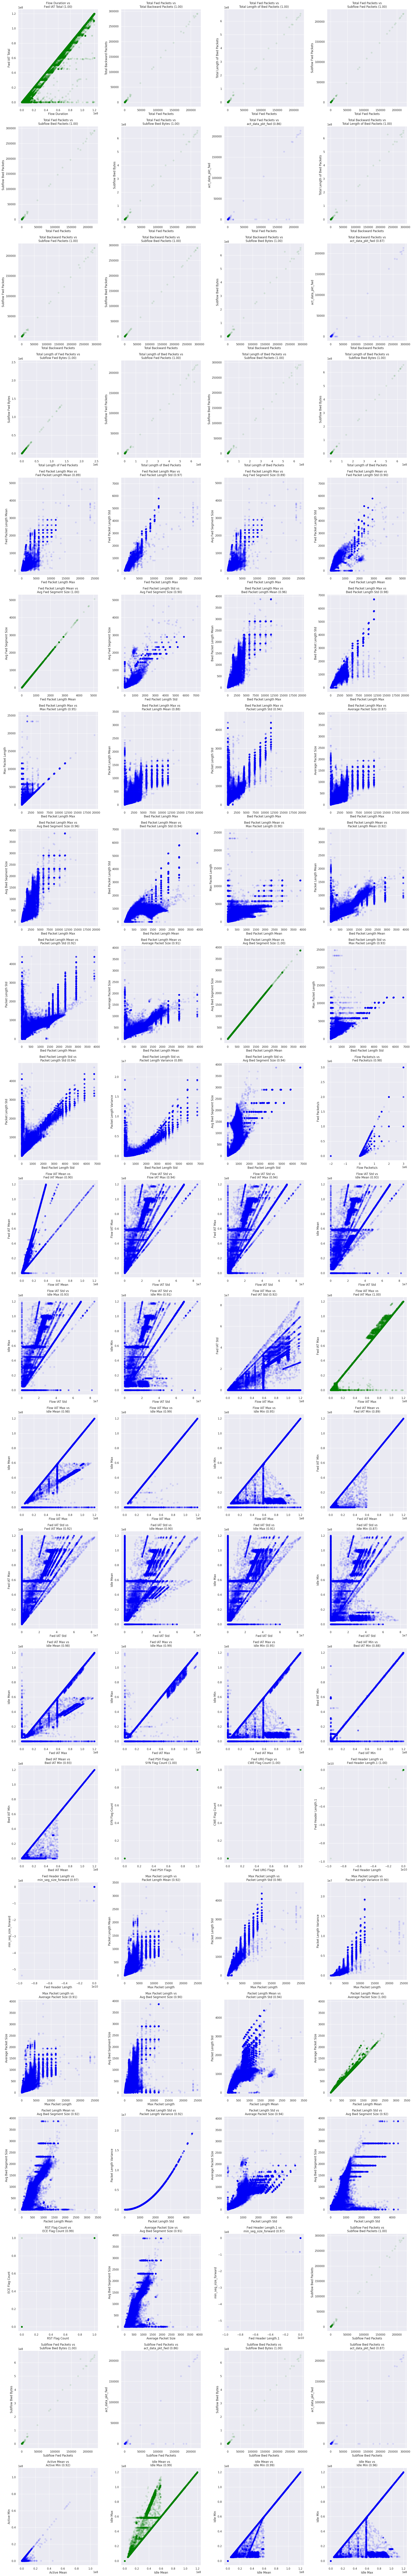

In [ ]:
cols = list(sampled_data.columns)[:-2]
high_corr_pairs = []
corr_th = 0.85

for i in range(len(cols)):
  for j in range(i + 1, len(cols)):
    val = sampled_data[cols[i]].corr(sampled_data[cols[j]])
    # If the correlation coefficient is NaN or below the threshold, skip to the next pair
    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, cols[i], cols[j]))

size, cols = len(high_corr_pairs), 4
rows, rem =  size // cols, size % cols
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols, figsize = (24, int(size * 1.7)))
for i in range(rows):
    for j in range(cols):
      try:
        val, x, y = high_corr_pairs[i * cols + j]
        if val > 0.99:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'green', alpha = 0.1)
        else:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'blue', alpha = 0.1)
        axs[i, j].set_xlabel(x)
        axs[i, j].set_ylabel(y)
        axs[i, j].set_title(f'{x} vs\n{y} ({val:.2f})')
      except IndexError:
        fig.delaxes(axs[i, j])

fig.tight_layout()
plt.show()

In [ ]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
data.drop('Attack Number', axis = 1, inplace = True)

In [ ]:
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                             Outlier Count  Outlier Percentage
Destination Port                    109264               21.66
Flow Duration                        94059               18.65
Total Fwd Packets                    50548               10.02
Total Backward Packets               47917                9.50
Total Length of Fwd Packets          62997               12.49
Total Length of Bwd Packets         114946               22.79
Fwd Packet Length Max                48745                9.66
Fwd Packet Length Min                 2611                0.52
Fwd Packet Length Mean               35787                7.09
Fwd Packet Length Std                47276                9.37
Bwd Packet Length Max                75002               14.87
Bwd Packet Length Min                13507                2.68
Bwd Packet Length Mean               87556               17.36
Bwd Packet Length Std                89801               17.80
Flow Bytes/s                         95014             

In [ ]:
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: Destination Port
- BENIGN: 93837 (22.36%)
- DoS: 0 (0.00%)
- DDoS: 0 (0.00%)
- Port Scan: 2209 (12.25%)
- Brute Force: 0 (0.00%)
- Bot: 0 (0.00%)
- Web Attack: 0 (0.00%)
- Infiltration: 0 (0.00%)

Feature: Flow Duration
- BENIGN: 97520 (23.24%)
- DoS: 8490 (21.85%)
- DDoS: 4318 (17.01%)
- Port Scan: 389 (2.16%)
- Brute Force: 426 (24.41%)
- Bot: 86 (22.57%)
- Web Attack: 60 (14.32%)
- Infiltration: 0 (0.00%)

Feature: Total Fwd Packets
- BENIGN: 78213 (18.64%)
- DoS: 489 (1.26%)
- DDoS: 816 (3.21%)
- Port Scan: 280 (1.55%)
- Brute Force: 0 (0.00%)
- Bot: 8 (2.10%)
- Web Attack: 60 (14.32%)
- Infiltration: 1 (10.00%)

Feature: Total Backward Packets
- BENIGN: 60289 (14.37%)
- DoS: 4517 (11.62%)
- DDoS: 0 (0.00%)
- Port Scan: 97 (0.54%)
- Brute Force: 0 (0.00%)
- Bot: 8 (2.10%)
- Web Attack: 37 (8.83%)
- Infiltration: 1 (10.00%)

Feature: Total Length of Fwd Packets
- BENIGN: 80572 (19.20%)
- DoS: 10164 (26.16%)
- DDoS: 4610 (18.16%)
- Port Scan: 118 (0.65%)
- Brute Force: 0 (0.

/tmp/ipython-input-326211583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)


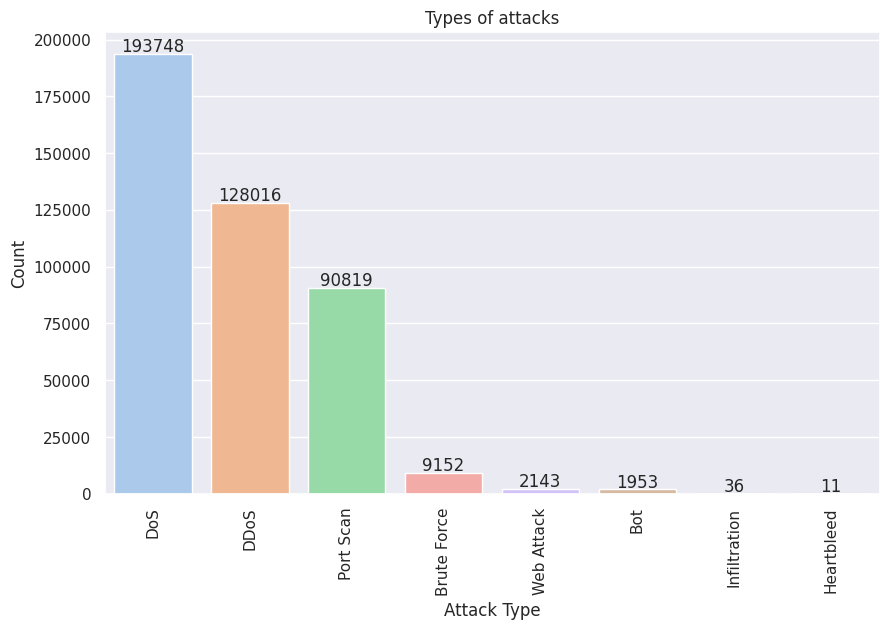

In [ ]:
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

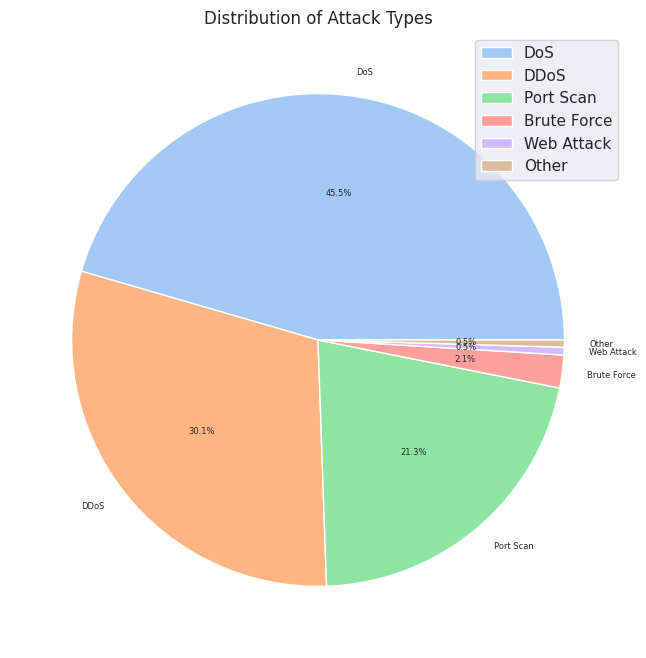

In [ ]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [ ]:
data.groupby('Attack Type').first()

Destination Port  Flow Duration  Total Fwd Packets  \
Attack Type                                                        
BENIGN                   54865              3                  2   
Bot                       8080       60202640                  9   
Brute Force                 80        5216127                  3   
DDoS                        80        1293792                  3   
DoS                         80        5169956                  8   
Heartbleed                 444      119302728               2685   
Infiltration               444       42664070                  5   
Port Scan                   80        5021059                  6   
Web Attack                  80        5185118                  7   

              Total Backward Packets  Total Length of Fwd Packets  \
Attack Type                                                         
BENIGN                             0                           12   
Bot                                9                          322   
Brute Force                        1                            0   
DDoS                               7                           26   
DoS                                6                         1101   
Heartbleed                      1729                         8299   
Infiltration                       6                          141   
Port Scan                          5                          703   
Web Attack                         7                         1022   

              Total Length of Bwd Packets  Fwd Packet Length Max  \
Attack Type                                                        
BENIGN                                  0                      6   
Bot                                   256                    322   
Brute Force                             0                      0   
DDoS                                11607                     20   
DoS                                  4222                    410   
Heartbleed                        7556917                    517   
Infiltration                          291                     93   
Port Scan                            1414                    356   
Web Attack                           2321                    372   

              Fwd Packet Length Min  Fwd Packet Length Mean  \
Attack Type                                                   
BENIGN                            6                6.000000   
Bot                               0               35.777778   
Brute Force                       0                0.000000   
DDoS                              0                8.666667   
DoS                               0              137.625000   
Heartbleed                        0                3.090875   
Infiltration                      0               28.200000   
Port Scan                         0              117.166667   
Web Attack                        0              146.000000   

              Fwd Packet Length Std  Bwd Packet Length Max  \
Attack Type                                                  
BENIGN                     0.000000                      0   
Bot                      107.333333                    256   
Brute Force                0.000000                      0   
DDoS                      10.263203                   5840   
DoS                      185.758628                   3525   
Heartbleed                16.858421                  17376   
Infiltration              38.861292                    267   
Port Scan                181.536131                   1050   
Web Attack               184.078788                   1047   

              Bwd Packet Length Min  Bwd Packet Length Mean  \
Attack Type                                                   
BENIGN                            0                0.000000   
Bot                               0               28.444444   
Brute Force                       0                0.000000   
DDoS                              0             1658.142857   
D

In [ ]:
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1539.53 MB
Final memory usage: 808.25 MB


In [ ]:
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

Reduced memory usage: 47.50%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2522362 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int32  
 1   Flow Duration                int32  
 2   Total Fwd Packets            int32  
 3   Total Backward Packets       int32  
 4   Total Length of Fwd Packets  int32  
 5   Total Length of Bwd Packets  int32  
 6   Fwd Packet Length Max        int32  
 7   Fwd Packet Length Min        int32  
 8   Fwd Packet Length Mean       float32
 9   Fwd Packet Length Std        float32
 10  Bwd Packet Length Max        int32  
 11  Bwd Packet Length Min        int32  
 12  Bwd Packet Length Mean       float32
 13  Bwd Packet Length Std        float32
 14  Flow Bytes/s                 float32
 15  Flow Packets/s               float32
 16  Flow IAT Mean                float32
 17  Flow IAT Std                 float32
 18  Flow IAT Max                 int32  
 19  Flow I

In [ ]:
data.describe().transpose()

count          mean           std  \
Destination Port             2522362.0  8.704762e+03  1.902507e+04   
Flow Duration                2522362.0  1.658132e+07  3.522426e+07   
Total Fwd Packets            2522362.0  1.027627e+01  7.941738e+02   
Total Backward Packets       2522362.0  1.156596e+01  1.056594e+03   
Total Length of Fwd Packets  2522362.0  6.115751e+02  1.058499e+04   
Total Length of Bwd Packets  2522362.0  1.813315e+04  2.397434e+06   
Fwd Packet Length Max        2522362.0  2.310918e+02  7.561625e+02   
Fwd Packet Length Min        2522362.0  1.919464e+01  6.079447e+01   
Fwd Packet Length Mean       2522362.0  6.347011e+01  1.934055e+02   
Fwd Packet Length Std        2522362.0  7.727760e+01  2.900386e+02   
Bwd Packet Length Max        2522362.0  9.743700e+02  2.037859e+03   
Bwd Packet Length Min        2522362.0  4.313467e+01  7.087022e+01   
Bwd Packet Length Mean       2522362.0  3.404131e+02  6.344271e+02   
Bwd Packet Length Std        2522362.0  3.763118e+02  8.773356e+02   
Flow Bytes/s                 2522362.0  1.409834e+06  2.653173e+07   
Flow Packets/s               2522362.0  4.726262e+04  2.018326e+05   
Flow IAT Mean                2522362.0  1.445246e+06  4.663554e+06   
Flow IAT Std                 2522362.0  3.276120e+06  8.456070e+06   
Flow IAT Max                 2522362.0  1.029310e+07  2.567868e+07   
Flow IAT Min                 2522362.0  1.703157e+05  3.013372e+06   
Fwd IAT Total                2522362.0  1.624176e+07  3.515781e+07   
Fwd IAT Mean                 2522362.0  2.917447e+06  9.912992e+06   
Fwd IAT Std                  2522362.0  3.666367e+06  1.015445e+07   
Fwd IAT Max                  2522362.0  1.013665e+07  2.575975e+07   
Fwd IAT Min                  2522362.0  1.134967e+06  9.056733e+06   
Bwd IAT Total                2522362.0  1.110336e+07  3.022113e+07   
Bwd IAT Mean                 2522362.0  2.026477e+06  9.271875e+06   
Bwd IAT Std                  2522362.0  1.667647e+06  6.595890e+06   
Bwd IAT Max                  2522362.0  5.257358e+06  1.809655e+07   
Bwd IAT Min                  2522362.0  1.085438e+06  8.794528e+06   
Fwd PSH Flags                2522362.0  4.873805e-02  2.153199e-01   
Bwd PSH Flags                2522362.0  0.000000e+00  0.000000e+00   
Fwd URG Flags                2522362.0  3.171630e-05  5.631635e-03   
Bwd URG Flags                2522362.0  0.000000e+00  0.000000e+00   
Fwd Header Length            2522362.0 -2.918210e+04  2.230271e+07   
Bwd Header Length            2522362.0 -2.553644e+03  1.538422e+06   
Fwd Packets/s                2522362.0  4.083435e+04  1.912258e+05   
Bwd Packets/s                2522362.0  6.509474e+03  3.776324e+04   
Min Packet Length            2522362.0  1.682349e+01  2.557873e+01   
Max Packet Length            2522362.0  1.063098e+03  2.121197e+03   
Packet Length Mean           2522362.0  1.905414e+02  3.173189e+02   
Packet Length Std            2522362.0  3.299987e+02  6.610489e+02   
Packet Length Variance       2522362.0  5.454382e+05  1.778817e+06   
FIN Flag Count               2522362.0  3.214685e-02  1.763900e-01   
SYN Flag Count               2522362.0  4.873805e-02  2.153199e-01   
RST Flag Count               2522362.0  2.719673e-04  1.648919e-02   
PSH Flag Count               2522362.0  2.975192e-01  4.571669e-01   
ACK Flag Count               2522362.0  3.121875e-01  4.633860e-01   
URG Flag Count               2522362.0  1.014276e-01  3.018941e-01   
CWE Flag Count               2522362.0  3.171630e-05  5.631635e-03   
ECE Flag Count               2522362.0  2.731567e-04  1.652520e-02   
Down/Up Ratio                2522362.0  7.003495e-01  6.955667e-01   
Average Packet Size          2522362.0  2.123115e+02  3.452480e+02   
Avg Fwd Segment Size         2522362.0  6.347011e+01  1.934055e+02   
Avg Bwd Segment Size         2522362.0  3.404131e+02  6.344271e+02   
Fwd Header Length.1          2522362.0 -2.918210e+04  2.230271e+07   
Fwd Avg Bytes/Bulk           2522362.0  0.0

In [ ]:
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [ ]:
data.shape

(2522362, 71)

In [ ]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

In [ ]:
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.23%


In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [ ]:
new_data


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0       -2.311094 -0.052684  0.515875  0.616537  3.840727  0.395336 -0.017878   
1       -2.246553 -0.049159  0.467881  0.395550  2.001551 -0.141045 -0.016487   
2       -2.258822 -0.049501  0.473634  0.408672  2.081408 -0.132962 -0.016754   
3       -2.249188 -0.050635  0.467051  0.346824  2.013841 -0.106530 -0.016178   
4       -2.311090 -0.052685  0.515877  0.616515  3.840698  0.395327 -0.017879   
...           ...       ...       ...       ...       ...       ...       ...   
2522357 -1.966993 -0.034823  0.214152 -0.550069 -0.715274 -0.255957 -0.028814   
2522358 -1.967205 -0.034920  0.140546 -0.769750 -1.329699 -1.050008 -0.084008   
2522359 -2.177556 -0.044307  0.882352  1.291548  4.455997  0.141248 -0.035232   
2522360 -1.906970 -0.035866  0.236786 -0.648835 -0.915041 -0.480387 -0.047541   
2522361 -1.981386 -0.033433  0.240070 -0.592283 -1.049958 -0.676476 -0.060077   

              PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0        0.186557  0.370079 -0.680438 -0.340149 -0.266433  1.635278  0.665315   
1       -0.780967 -0.889976  2.660582  0.411741  0.404896  0.836641 -0.101931   
2       -0.769681 -0.877466  2.634068  0.401435  0.393491  0.968392 -0.073518   
3       -0.745133 -0.840229  2.506786  0.378657  0.371421  1.016718 -0.034708   
4        0.186543  0.370100 -0.680454 -0.340152 -0.266433  1.635264  0.665320   
...           ...       ...       ...       ...       ...       ...       ...   
2522357 -0.395631  0.253441 -0.399620 -0.075822 -0.017902 -0.581193  0.159172   
2522358 -0.676149  1.052839 -0.349890 -0.071681  0.034673  0.023709  0.084573   
2522359  0.677099  1.469905 -0.910787 -0.146735 -0.035853 -2.571259 -0.823715   
2522360 -0.496969  0.535691 -0.471521 -0.094094 -0.003074 -0.595404  0.180017   
2522361 -0.530530  0.720426 -0.501673 -0.101678  0.003594 -0.570340  0.147065   

             PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0       -1.895494 -0.138855 -0.005556  0.453169 -0.814374 -0.486573 -0.470138   
1        0.925867 -0.062942  0.000003  0.298871 -0.367053 -0.375623 -0.398645   
2        0.854770 -0.005022  0.007445  0.348229 -0.289745 -0.245034 -0.442864   
3        0.735186  0.071080  0.016595  0.390537 -0.181640 -0.073434 -0.473776   
4       -1.895503 -0.138857 -0.005556  0.453173 -0.814384 -0.486570 -0.470143   
...           ...       ...       ...       ...       ...       ...       ...   
2522357 -0.569453 -0.258389 -0.029447 -0.107606 -0.505889 -0.163024 -0.097383   
2522358 -0.236005  0.090453  0.018276  0.217992 -0.059812 -0.013755  0.113308   
2522359  3.071331 -0.947479 -0.131738 -1.099300 -0.254745  0.688442 -0.640662   
2522360 -0.620484 -0.236342 -0.024442 -0.003136 -0.465742 -0.176056 -0.010992   
2522361 -0.596875 -0.184869 -0.016581  0.050009 -0.332118 -0.183395  0.039784   

             PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0       -0.004641 -2.130732  0.145377 -0.163093 -0.050706 -0.233945  0.699887   
1       -1.073630 -0.327282 -0.254919 -0.287932  0.715411 -0.012903  0.543839   
2       -0.999573 -0.217613 -0.276038 -0.326148  0.735272 -0.020362  0.539934   
3       -0.925454 -0.015574 -0.265095 -0.347247  0.700953 -0.027380  0.175826   
4       -0.004637 -2.130707  0.145360 -0.163099 -0.050762 -0.233960  0.699809   
...           ...       ...       ...       ...       ...       ...       ...   
2522357  0.299323  0.060292 -0.058730 -0.597401  0.068725 -0.296905 -0.081193   
2522358  0.177115  0.130656 -0.438373  0.350816  0.365842  0.177611  0.145811   
2522359  0.771187  0.919094 -0.600840  0.010523  0.148825 -0.031176  1.551953   
2522360  0.414358  0.039426 -0.250487 -0.467611  0.375742 -0.168155  0.066397   
2522361  0.457694 -0.087778 -0.154264 -0.644988  0.436251 -0.248084  0.030778   

             PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0       -0.539784 -0.035279  0.023075  0.

In [ ]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

Attack Type
1    7552
0    7448
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

In [ ]:
def create_sequences(X, y, seq_len=10):
    sequences, labels = [], []
    for i in range(len(X) - seq_len + 1):
        sequences.append(X[i:i + seq_len])
        labels.append(y.iloc[i + seq_len - 1]) # Changed to .iloc for positional indexing
    return np.array(sequences), np.array(labels)

SEQ_LENGTH = 10
X_seq, y_seq = create_sequences(X_bc, y_bc, SEQ_LENGTH)

print(f"Sequential data shape: {X_seq.shape}")  # (samples, seq_len, features)
print(f"Sequential labels shape: {y_seq.shape}")

Sequential data shape: (14991, 10, 35)
Sequential labels shape: (14991,)


In [ ]:

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Check GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"PyTorch version: {torch.__version__}")
print(f"Using device: {device}")

PyTorch version: 2.9.0+cu126
Using device: cuda


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.25, random_state=0, stratify=y_seq
)

# Convert to PyTorch tensors
X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.LongTensor(y_train)
X_test_t = torch.FloatTensor(X_test)
y_test_t = torch.LongTensor(y_test)

num_classes = len(np.unique(y_seq))

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")
print(f"Number of classes: {num_classes}")

Train shape: (11243, 10, 35)
Test shape: (3748, 10, 35)
Number of classes: 2


In [ ]:

BATCH_SIZE = 256

train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"✅ Train batches: {len(train_loader)}")
print(f"✅ Test batches: {len(test_loader)}")

✅ Train batches: 44
✅ Test batches: 15


In [ ]:

class AttentionLayer(nn.Module):
    def __init__(self, hidden_size):
        super(AttentionLayer, self).__init__()
        self.attention = nn.Linear(hidden_size, 1)

    def forward(self, lstm_output):
        # lstm_output shape: (batch, seq_len, hidden_size)
        attention_weights = torch.softmax(self.attention(lstm_output), dim=1)
        # attention_weights shape: (batch, seq_len, 1)
        context_vector = torch.sum(attention_weights * lstm_output, dim=1)
        # context_vector shape: (batch, hidden_size)
        return context_vector, attention_weights

print("✅ Attention Layer defined")

✅ Attention Layer defined


In [ ]:

class CNNLSTMAttention(nn.Module):
    def __init__(self, input_size, num_classes, seq_length):
        super(CNNLSTMAttention, self).__init__()


        self.conv1 = nn.Conv1d(in_channels=seq_length, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.dropout_cnn = nn.Dropout(0.3)

        # ========== LSTM BRANCH
        self.lstm1 = nn.LSTM(
            input_size=input_size,
            hidden_size=128,
            num_layers=1,
            batch_first=True,
            dropout=0.3,
            bidirectional=True
        )
        self.lstm2 = nn.LSTM(
            input_size=256,
            hidden_size=64,
            num_layers=1,
            batch_first=True,
            dropout=0.3,
            bidirectional=True
        )

        self.attention = AttentionLayer(hidden_size=128)  # 64*2 for bidirectional

        # yha pe fusion aur classification bhi h
        self.fc1 = nn.Linear(128 + 128, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        batch_size = x.size(0)

        # ========== CNN PATH ==========
        cnn_out = self.relu(self.bn1(self.conv1(x)))
        cnn_out = self.pool(cnn_out)
        cnn_out = self.relu(self.bn2(self.conv2(cnn_out)))
        cnn_out = self.pool(cnn_out)
        cnn_out = self.dropout_cnn(cnn_out)
        cnn_out = torch.mean(cnn_out, dim=2)


        lstm_out, _ = self.lstm1(x)  # (batch, seq_len, 256)
        lstm_out, _ = self.lstm2(lstm_out)  # (batch, seq_len, 128)

        attended_out, attn_weights = self.attention(lstm_out)

        # ========== FUSION
        fused = torch.cat([attended_out, cnn_out], dim=1)

        # ========== CLASSIFICATION
        out = self.relu(self.bn3(self.fc1(fused)))
        out = self.dropout1(out)
        out = self.relu(self.fc2(out))
        out = self.dropout2(out)
        out = self.fc3(out)

        return out


model = CNNLSTMAttention(
    input_size=X_train.shape[2],
    num_classes=num_classes,
    seq_length=SEQ_LENGTH
).to(device)

print(f"✅ Model initialized")
print(f"📊 Total parameters: {sum(p.numel() for p in model.parameters()):,}")

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


✅ Model initialized
📊 Total parameters: 460,483


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', patience=5, factor=0.5, min_lr=0.00001
)

print("✅ Optimizer and loss function configured")

✅ Optimizer and loss function configured


In [ ]:

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for X_batch, y_batch in tqdm(loader, desc="Training"):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    return running_loss / len(loader), 100 * correct / total

def validate_epoch(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    return running_loss / len(loader), 100 * correct / total

print("✅ Training functions defined")

✅ Training functions defined


In [ ]:

EPOCHS = 20

# For tracking
train_losses, val_losses = [], []
train_accs, val_accs = [], []
best_val_acc = 0
patience_counter = 0
PATIENCE = 10

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")
    print("-" * 50)

    # Train
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)

    # Validate
    val_loss, val_acc = validate_epoch(model, test_loader, criterion, device)

    # Scheduler step
    scheduler.step(val_loss)

    # Store metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

    # Early stopping & best model saving ka use kiye h yha pe
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"✅ Best model saved! Val Acc: {val_acc:.2f}%")
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= PATIENCE:
        print(f"\n⚠️ Early stopping triggered after {epoch+1} epochs")
        break

# Load best model
model.load_state_dict(torch.load('best_model.pth'))
print("\n✅ Training completed! Best model loaded.")


Epoch 1/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:03<00:00, 12.82it/s]


Train Loss: 0.5410 | Train Acc: 70.74%
Val Loss: 0.4580 | Val Acc: 84.58%
✅ Best model saved! Val Acc: 84.58%

Epoch 2/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 115.76it/s]


Train Loss: 0.1975 | Train Acc: 92.33%
Val Loss: 0.3016 | Val Acc: 89.83%
✅ Best model saved! Val Acc: 89.83%

Epoch 3/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 113.18it/s]


Train Loss: 0.1555 | Train Acc: 94.41%
Val Loss: 0.2983 | Val Acc: 89.75%

Epoch 4/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 76.70it/s]


Train Loss: 0.1298 | Train Acc: 95.22%
Val Loss: 0.1435 | Val Acc: 95.04%
✅ Best model saved! Val Acc: 95.04%

Epoch 5/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 76.57it/s]


Train Loss: 0.1205 | Train Acc: 95.52%
Val Loss: 0.1427 | Val Acc: 95.01%

Epoch 6/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 80.07it/s]


Train Loss: 0.1104 | Train Acc: 95.70%
Val Loss: 0.1440 | Val Acc: 94.56%

Epoch 7/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 72.19it/s]


Train Loss: 0.1062 | Train Acc: 95.93%
Val Loss: 0.1666 | Val Acc: 93.81%

Epoch 8/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 85.04it/s]


Train Loss: 0.0949 | Train Acc: 96.46%
Val Loss: 0.2250 | Val Acc: 93.49%

Epoch 9/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 86.16it/s]


Train Loss: 0.0935 | Train Acc: 96.32%
Val Loss: 0.1646 | Val Acc: 94.61%

Epoch 10/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 83.56it/s]


Train Loss: 0.0922 | Train Acc: 96.38%
Val Loss: 0.1267 | Val Acc: 95.25%
✅ Best model saved! Val Acc: 95.25%

Epoch 11/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 82.49it/s]


Train Loss: 0.0837 | Train Acc: 96.76%
Val Loss: 0.1400 | Val Acc: 94.90%

Epoch 12/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 82.02it/s]


Train Loss: 0.0752 | Train Acc: 96.98%
Val Loss: 0.2078 | Val Acc: 90.31%

Epoch 13/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 84.30it/s]


Train Loss: 0.0781 | Train Acc: 96.97%
Val Loss: 0.1459 | Val Acc: 94.85%

Epoch 14/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 85.55it/s]


Train Loss: 0.0631 | Train Acc: 97.37%
Val Loss: 0.1592 | Val Acc: 94.69%

Epoch 15/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 86.05it/s]


Train Loss: 0.0612 | Train Acc: 97.67%
Val Loss: 0.2424 | Val Acc: 91.20%

Epoch 16/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 83.23it/s]


Train Loss: 0.0612 | Train Acc: 97.56%
Val Loss: 0.1656 | Val Acc: 94.80%

Epoch 17/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 81.68it/s]


Train Loss: 0.0483 | Train Acc: 98.07%
Val Loss: 0.2096 | Val Acc: 93.68%

Epoch 18/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 80.93it/s]


Train Loss: 0.0414 | Train Acc: 98.38%
Val Loss: 0.2039 | Val Acc: 94.05%

Epoch 19/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 84.06it/s]


Train Loss: 0.0358 | Train Acc: 98.59%
Val Loss: 0.2549 | Val Acc: 94.82%

Epoch 20/20
--------------------------------------------------


Training: 100%|██████████| 44/44 [00:00<00:00, 80.97it/s]


Train Loss: 0.0366 | Train Acc: 98.66%
Val Loss: 0.2195 | Val Acc: 94.53%

⚠️ Early stopping triggered after 20 epochs

✅ Training completed! Best model loaded.


In [ ]:

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.numpy())

y_pred = np.array(all_preds)
y_test_np = np.array(all_labels)

# Metrics
accuracy = accuracy_score(y_test_np, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_np, y_pred, average='weighted')

print(f"\n{'='*50}")
print(f"📊 MODEL EVALUATION RESULTS")
print(f"{'='*50}")
print(f"Accuracy:  {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall:    {recall*100:.2f}%")
print(f"F1-Score:  {f1*100:.2f}%")
print(f"{'='*50}\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test_np, y_pred, target_names=['Normal', 'Attack']))


📊 MODEL EVALUATION RESULTS
Accuracy:  95.25%
Precision: 95.28%
Recall:    95.25%
F1-Score:  95.25%

Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.94      0.95      1861
      Attack       0.94      0.97      0.95      1887

    accuracy                           0.95      3748
   macro avg       0.95      0.95      0.95      3748
weighted avg       0.95      0.95      0.95      3748



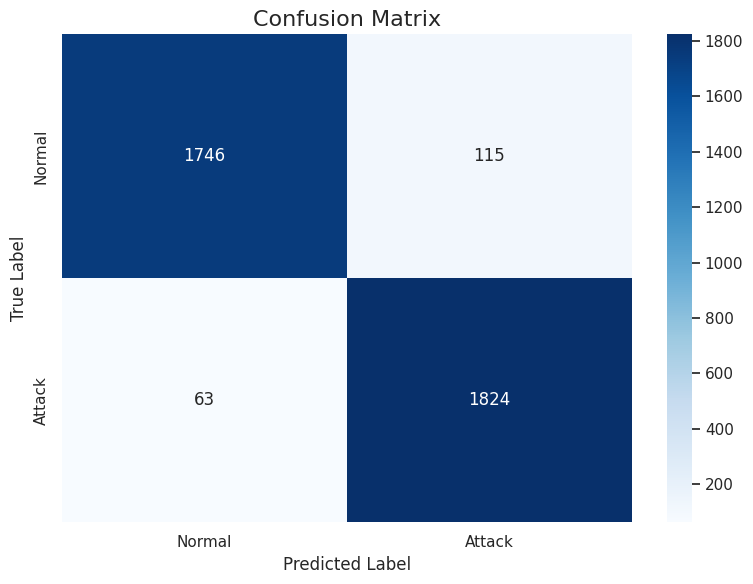

True Negatives: 1746
False Positives: 115
False Negatives: 63
True Positives: 1824


In [ ]:

cm = confusion_matrix(y_test_np, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'],
            yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"True Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

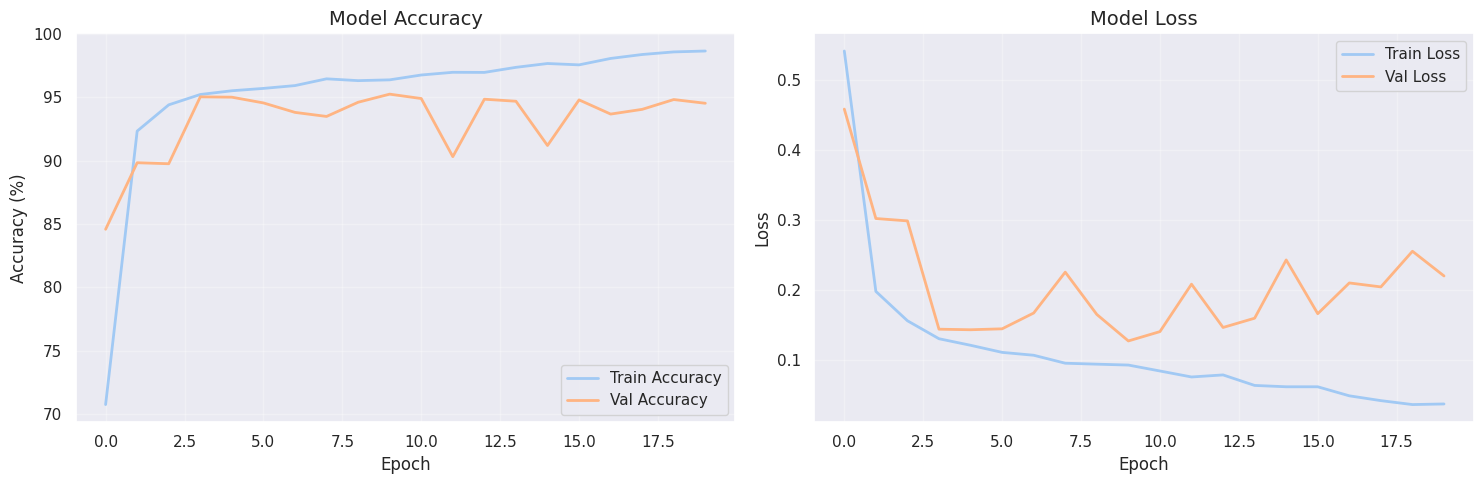

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
axes[0].plot(train_accs, label='Train Accuracy', linewidth=2)
axes[0].plot(val_accs, label='Val Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy', fontsize=14)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(train_losses, label='Train Loss', linewidth=2)
axes[1].plot(val_losses, label='Val Loss', linewidth=2)
axes[1].set_title('Model Loss', fontsize=14)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:

torch.save(model.state_dict(), 'cnn_lstm_attention_final.pth')
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_losses': train_losses,
    'val_losses': val_losses,
    'train_accs': train_accs,
    'val_accs': val_accs,
}, 'cnn_lstm_attention_complete.pth')

print("✅ Model saved as 'cnn_lstm_attention_final.pth'")

# Download model (optional)
from google.colab import files
files.download('cnn_lstm_attention_final.pth')
files.download('cnn_lstm_attention_complete.pth')

✅ Model saved as 'cnn_lstm_attention_final.pth'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve,
    average_precision_score, matthews_corrcoef
)

# Get predictions
model.eval()
all_preds, all_labels, all_probs = [], [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.numpy())
        all_probs.extend(probs.cpu().numpy())

y_pred = np.array(all_preds)
y_true = np.array(all_labels)
y_probs = np.array(all_probs)

# Calculate all metrics
cm = confusion_matrix(y_true, y_pred)
TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
fpr_roc, tpr_roc, _ = roc_curve(y_true, y_probs[:, 1])
roc_auc = auc(fpr_roc, tpr_roc)
avg_precision = average_precision_score(y_true, y_probs[:, 1])
mcc = matthews_corrcoef(y_true, y_pred)

# Print summary
print(f"\n{'='*60}")
print(f"📊 MODEL EVALUATION SUMMARY")
print(f"{'='*60}")
print(f"Accuracy:  {accuracy_score(y_true, y_pred)*100:.2f}%")
print(f"Precision: {precision_recall_fscore_support(y_true, y_pred, average='weighted')[0]*100:.2f}%")
print(f"Recall:    {precision_recall_fscore_support(y_true, y_pred, average='weighted')[1]*100:.2f}%")
print(f"F1-Score:  {precision_recall_fscore_support(y_true, y_pred, average='weighted')[2]*100:.2f}%")
print(f"ROC-AUC:   {roc_auc:.4f}")
print(f"Avg Prec:  {avg_precision:.4f}")
print(f"MCC:       {mcc:.4f}")
print(f"\nFalse Positives: {FP} | False Negatives: {FN}")
print(f"{'='*60}\n")

print(classification_report(y_true, y_pred, target_names=['Normal', 'Attack']))


📊 MODEL EVALUATION SUMMARY
Accuracy:  95.25%
Precision: 95.28%
Recall:    95.25%
F1-Score:  95.25%
ROC-AUC:   0.9900
Avg Prec:  0.9903
MCC:       0.9053

False Positives: 115 | False Negatives: 63

              precision    recall  f1-score   support

      Normal       0.97      0.94      0.95      1861
      Attack       0.94      0.97      0.95      1887

    accuracy                           0.95      3748
   macro avg       0.95      0.95      0.95      3748
weighted avg       0.95      0.95      0.95      3748



In [ ]:


def predict_cyber_threats(model, new_data, device, seq_length=10, return_probs=True):
    """
    Predict cyber threats on new network traffic data

    Parameters:
    -----------
    model : PyTorch model
        Trained CNN-LSTM-Attention model
    new_data : numpy array or pandas DataFrame
        New network traffic features (same features as training)
        Shape: (n_samples, n_features)
    device : torch.device
        CPU or CUDA
    seq_length : int
        Sequence length (should match training)
    return_probs : bool
        If True, return probabilities along with predictions

    Returns:
    --------
    predictions : dict with keys:
        - 'labels': Binary predictions (0=Normal, 1=Attack)
        - 'probabilities': Confidence scores for each class
        - 'confidence': Max probability (confidence in prediction)
        - 'threat_level': Human-readable threat level
    """

    model.eval()

    # Convert to numpy if DataFrame
    if isinstance(new_data, pd.DataFrame):
        new_data = new_data.values

    # Create sequences
    if len(new_data) < seq_length:
        print(f"⚠️ Warning: Data has {len(new_data)} samples, need at least {seq_length}")
        print(f"   Padding with zeros...")
        padding = np.zeros((seq_length - len(new_data), new_data.shape[1]))
        new_data = np.vstack([padding, new_data])

    sequences = []
    for i in range(len(new_data) - seq_length + 1):
        sequences.append(new_data[i:i + seq_length])

    X_new = np.array(sequences)

    # Convert to tensor
    X_tensor = torch.FloatTensor(X_new).to(device)

    # Predict
    with torch.no_grad():
        outputs = model(X_tensor)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()

    # Get confidence scores
    confidence = np.max(probabilities, axis=1)

    # Threat levels
    threat_levels = []
    for pred, conf in zip(predictions, confidence):
        if pred == 0:
            threat_levels.append('✅ NORMAL')
        else:
            if conf >= 0.95:
                threat_levels.append('🔴 HIGH THREAT')
            elif conf >= 0.80:
                threat_levels.append('🟠 MEDIUM THREAT')
            else:
                threat_levels.append('🟡 LOW THREAT')

    results = {
        'labels': predictions,
        'probabilities': probabilities,
        'confidence': confidence,
        'threat_level': threat_levels
    }

    return results

print("✅ Prediction function created!")

✅ Prediction function created!


In [ ]:

sample_size = 20
sample_indices = np.random.choice(len(X_test), sample_size, replace=False)
X_sample = X_test[sample_indices]
y_sample_true_original = y_test[sample_indices]

# Flatten sequences for display (take last flow in each sequence)
X_sample_flat = X_sample[:, -1, :]  # Shape: (20, features)

# Predict
predictions = predict_cyber_threats(model, X_sample_flat, device, seq_length=SEQ_LENGTH)

# Adjust y_sample_true to match the number of predictions generated by the sequencing logic
y_sample_true = y_sample_true_original[SEQ_LENGTH - 1:]

# Display results
print(f"\n{'='*80}")
print(f"🔍 REAL-TIME THREAT DETECTION RESULTS")
print(f"{'='*80}")
print(f"{'Index':<8} {'True':<10} {'Predicted':<10} {'Confidence':<12} {'Threat Level':<20}")
print(f"{'-'*80}")

for i in range(len(predictions['labels'])):
    true_label = 'Normal' if y_sample_true[i] == 0 else 'Attack'
    pred_label = 'Normal' if predictions['labels'][i] == 0 else 'Attack'
    confidence = predictions['confidence'][i]
    threat = predictions['threat_level'][i]

    # Color coding
    match = '✓' if true_label == pred_label else '✗'

    print(f"{i:<8} {true_label:<10} {pred_label:<10} {confidence:<12.4f} {threat:<20} {match}")

print(f"{'='*80}\n")

# Accuracy on sample
sample_accuracy = np.mean(predictions['labels'] == y_sample_true) * 100
print(f"📊 Sample Accuracy: {sample_accuracy:.2f}%")



🔍 REAL-TIME THREAT DETECTION RESULTS
Index    True       Predicted  Confidence   Threat Level        
--------------------------------------------------------------------------------
0        Attack     Normal     1.0000       ✅ NORMAL             ✗
1        Normal     Attack     0.9303       🟠 MEDIUM THREAT      ✗
2        Attack     Attack     1.0000       🔴 HIGH THREAT        ✓
3        Attack     Attack     1.0000       🔴 HIGH THREAT        ✓
4        Normal     Attack     0.9998       🔴 HIGH THREAT        ✗
5        Attack     Normal     0.9976       ✅ NORMAL             ✗
6        Normal     Attack     0.9963       🔴 HIGH THREAT        ✗
7        Attack     Attack     1.0000       🔴 HIGH THREAT        ✓
8        Normal     Normal     1.0000       ✅ NORMAL             ✓
9        Normal     Attack     0.9995       🔴 HIGH THREAT        ✗
10       Attack     Normal     1.0000       ✅ NORMAL             ✗

